Socket created
Socket bind complete
Socket now listening
loop0000
____E


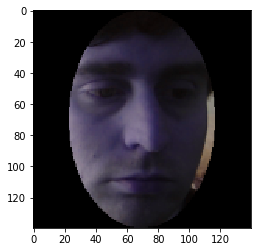

____E


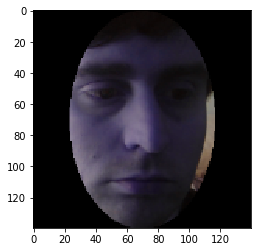

____E


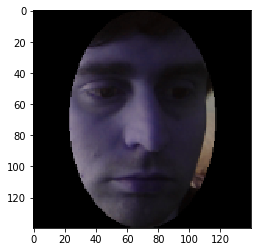

____E


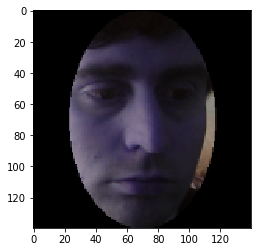

____E


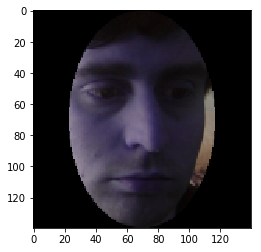

____E


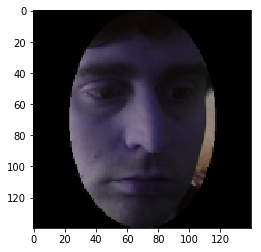

____E


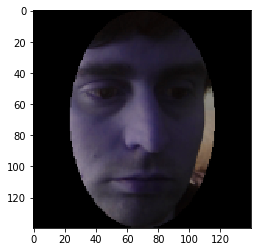

____E


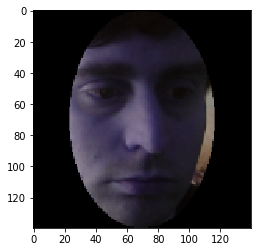

____E


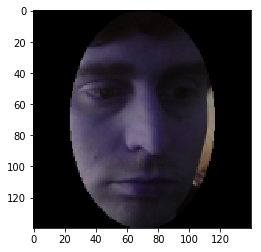

____E


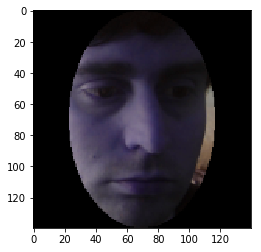

____E


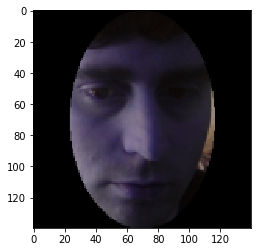

____E


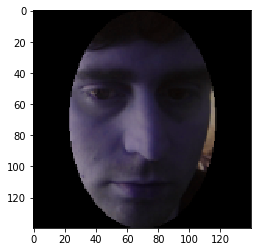

____E


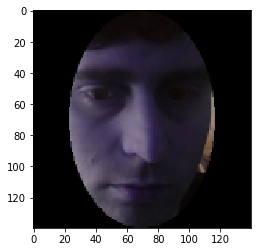

____E


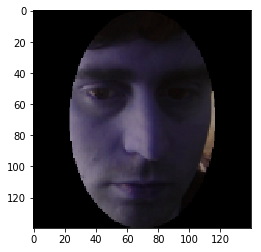

____E


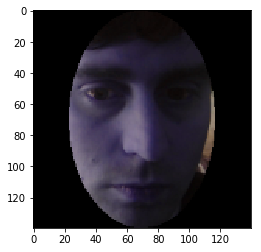

____E


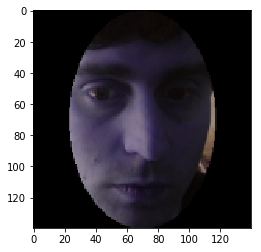

____E


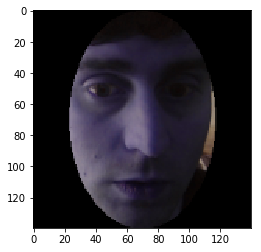

____E


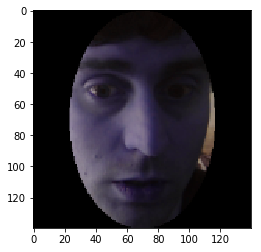

____E


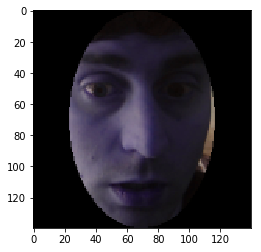

____E


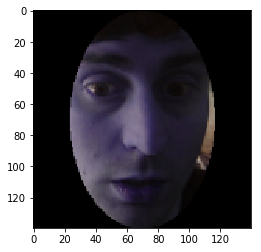

____E


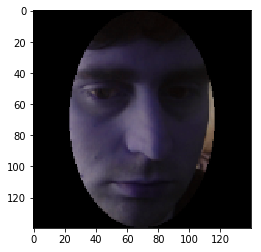

____E


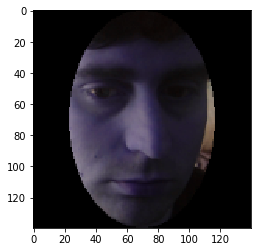

____E


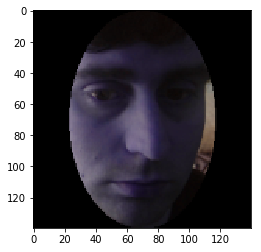

____E


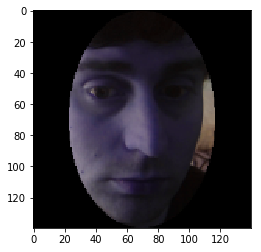

____E


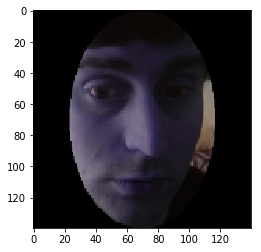

____E


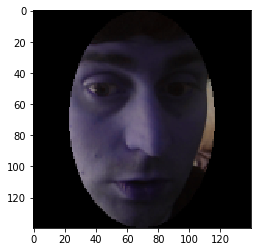

____E


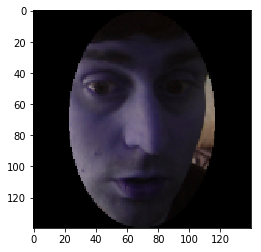

____E


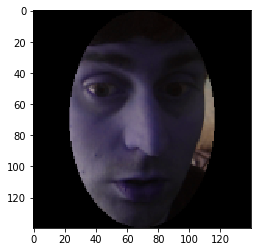

____E


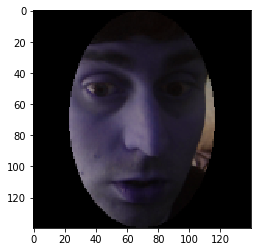

____E


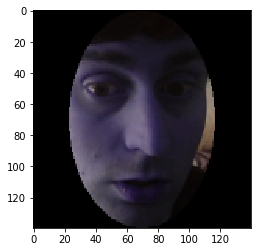

____E


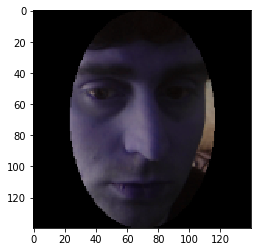

____E


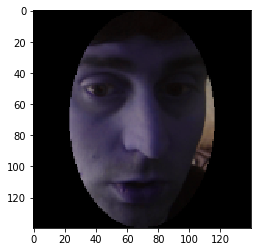

____E


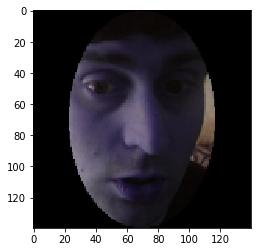

____E


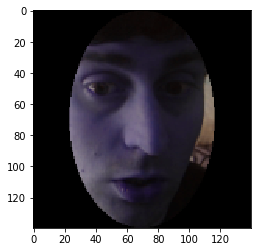

____E


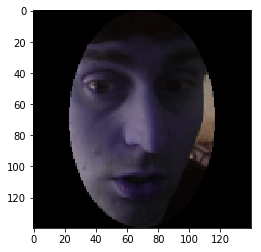

____E


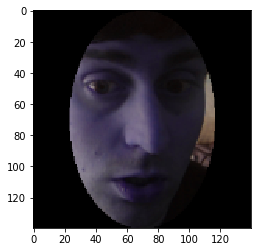

____E


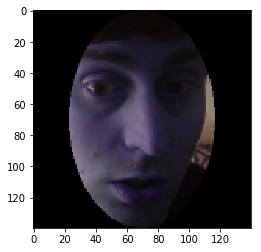

____E


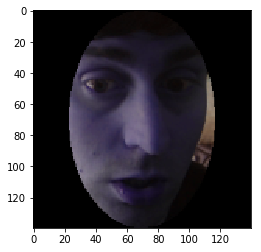

____E


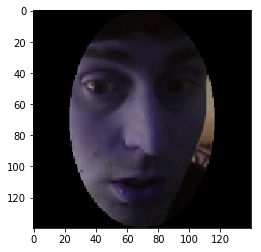

____E


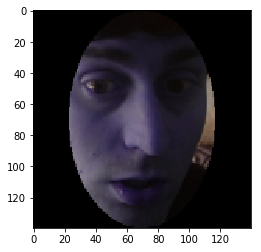

____E


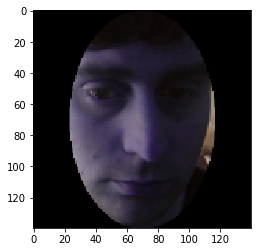

____E


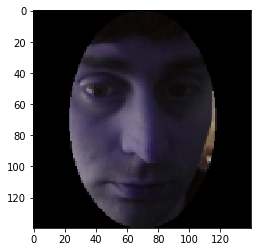

____E


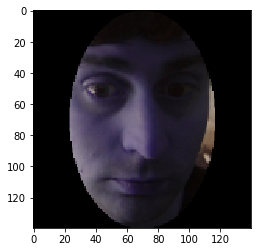

____E


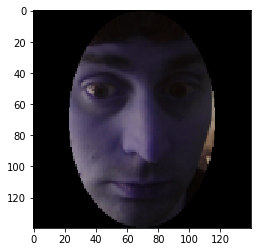

____E


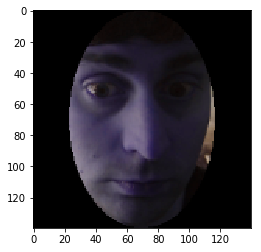

____E


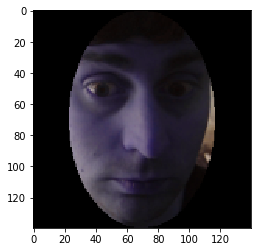

____E


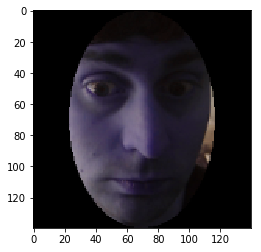

____E


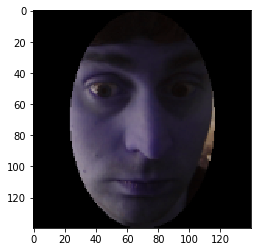

____E


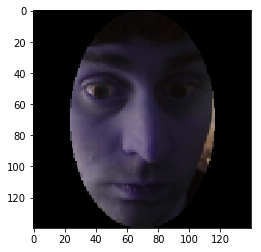

____E


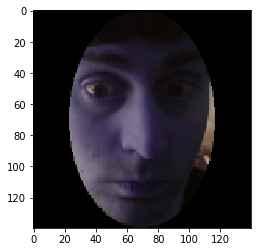

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import socket
import sys
import cv2
import pickle
import numpy as np
import struct
import time 




HOST = '127.0.0.1'
PORT = 8085

s=socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
print('Socket created')

s.bind((HOST, PORT))
print('Socket bind complete')
s.listen(10)
print('Socket now listening')

conn, addr = s.accept()

data = b''
payload_size = struct.calcsize("L")
print('loop0000')
img = []
while True:
    #print('A___')
    while len(data) < payload_size:
        data += conn.recv(4096)
        #print('_B__')        
    packed_msg_size = data[:payload_size]

    data = data[payload_size:]
    msg_size = struct.unpack("L", packed_msg_size)[0]

    while len(data) < msg_size:
        data += conn.recv(4096)
        #print('__C_')
    frame_data = data[:msg_size]
    data = data[msg_size:]
    
    frame=pickle.loads(frame_data)
    #imgs = frame
    #print(frame.size)
    #print(type(frame))
    for img in frame:
        time.sleep(1)
        print('____E')
        plt.imshow(np.array(img))
        plt.show()
        
#     f, axarr = plt.subplots(2,2)
#     axarr[0,0].imshow(image_datas[0])
#     axarr[0,1].imshow(image_datas[1])
#     axarr[1,0].imshow(image_datas[2])
#     axarr[1,1].imshow(image_datas[3])
        
        #cv2.imshow('frame', np.array(img))
#     c = cv2.waitKey(1)
#     if c & 0xFF == ord('q'):
#         print('___D')
#         print('Press enter ... Destroy Window')
#         c = cv2.waitKey(0)
#         cv2.destroyAllWindows()
#         s.close()
#         break

s.close()
print('Connection Closed')